## HF Dataset

In [5]:
from datasets import load_dataset 

emotion = load_dataset("emotion")  

emotion

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
train = emotion["train"] 

train 


Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [14]:
train.column_names

['text', 'label']

In [15]:
train.features 

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [16]:
train[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [17]:
print(train[0]["text"]) 
print(train[0]["label"])

i didnt feel humiliated
0


## load via url and save to disk

In [19]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
!wget {dataset_url}

--2025-06-26 23:32:27--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6022:18::a27d:4212, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6022:18::a27d:4212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train.txt’

train.txt               [ <=>                ]  70.02K  --.-KB/s    in 0.1s    

2025-06-26 23:32:28 (691 KB/s) - ‘train.txt’ saved [71699]



## turn to dataframe

In [22]:
import pandas as pd 

emotion.set_format(type="pandas")
df = emotion["train"][:] 
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


## turn the label (emotion) to categorical 

In [24]:
def label_int2tr(label):
    return emotion["train"].features["label"].int2str(label) 

df["label_str"] = df["label"].apply(label_int2tr) 

df.head()   

,text,label,label_str
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Class Distribution 

<Axes: xlabel='label_str'>

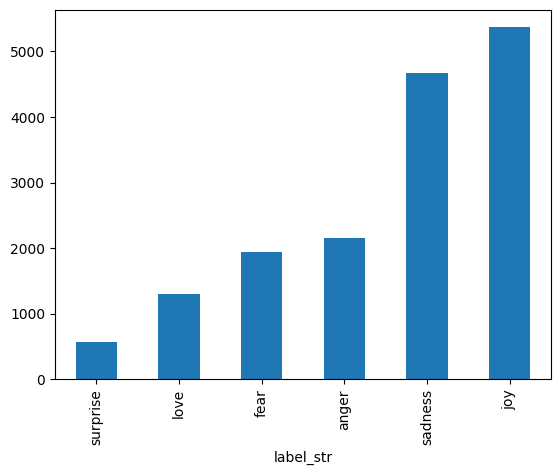

In [28]:
df["label_str"].value_counts(ascending=True).plot.bar()  

# A case of imbalanced data . soultions 
- Random sampling over the majority class 
- random sampling under the majority class 
- Gathering more data 